### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Data

In [2]:
data = pd.read_csv('./1.04.+Real-life+example.csv')

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
data.shape

(4345, 9)

In [5]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Data Cleaning

As we can notice that the total observations in some columns are less than other columns maximum being 4345 which also happens to be total observations of our dataset. <br>
This is because of non-available data in our dataset, and in order to perform Linear Regression, we should clean our dataset by removing such observations.

In [6]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Analysing the Probability distribution curve for non vategorial variables
<p> On observing descriptive statistics from close, specifically in non categorial variables namely:
<li> Price
<li> Milage
<li> EngineV
<li> Year
</P>
<p>
We will observe that the descriptive statistics are indicating towards the presence of Outliers. <br>
To confirm that we can take a look at the probability distribution curves for these variables.

Text(0.5, 1.0, 'Year')

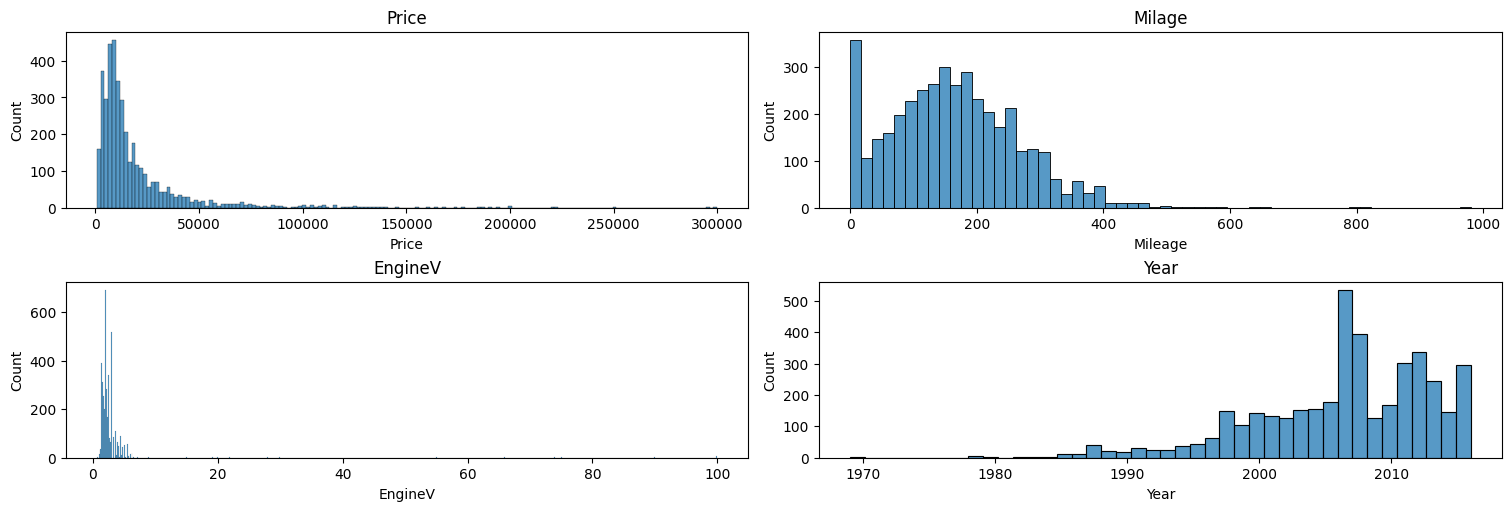

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5), layout="constrained")
sns.histplot(data['Price'], ax=axs[0,0])
sns.histplot(data['Mileage'], ax=axs[0,1])
sns.histplot(data['EngineV'], ax=axs[1,0])
sns.histplot(data['Year'], ax=axs[1,1])
axs[0,0].set_title("Price")
axs[0,1].set_title("Milage")
axs[1,0].set_title("EngineV")
axs[1,1].set_title("Year")


<p> On observing these charts, we can notice that all of these charts have thin tails in the right indicating the presence of outliers. <br>
So our next step will be to remove these outliers.</p>
<p> So to make our data more useful, we will remove the top 1% of values from Price and Milage variables and any value that is greater than 6.5 in Engine Volume column.
<p> We will also remove all observations where the year is in first percentile of data, as it is possible that these cars are vintage and that can reduce the linearity from our dataset.

In [10]:
# Removing Outiers from price
Q_price = data['Price'].quantile(0.99)
Q_milage = data['Mileage'].quantile(0.99)
Q_year = data['Year'].quantile(0.01)

data = data[(data['Price'] < Q_price) & (data['Mileage'] < Q_milage) & (data['Year'] > Q_year) & (data['EngineV'] <= 6.5)]


In [11]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18201.955032,NaN,160.471425,2.451293,NaN,NaN,2006.713473,NaN
std,NaN,19086.956320,NaN,95.531340,0.951521,NaN,NaN,6.100481,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


Text(0.5, 1.0, 'Year')

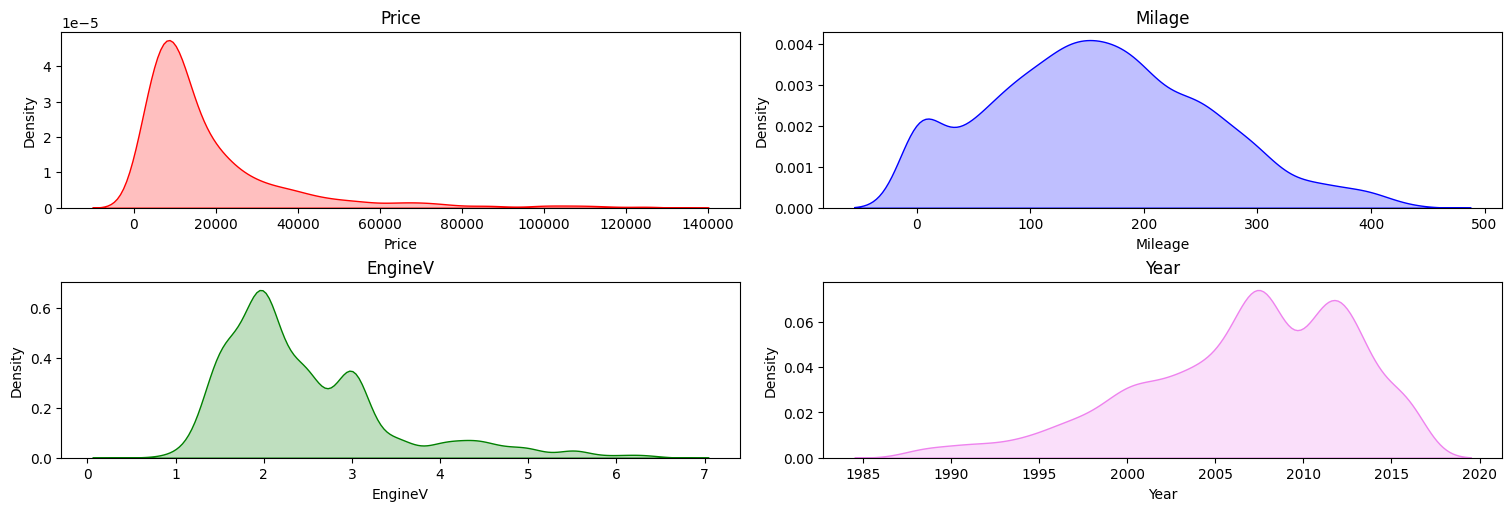

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,5), layout="constrained")
sns.kdeplot(data['Price'], fill=True, color="red", ax=axs[0,0])
sns.kdeplot(data['Mileage'], fill=True, color="blue", ax=axs[0,1])
sns.kdeplot(data['EngineV'], fill=True, color="green", ax=axs[1,0])
sns.kdeplot(data['Year'], fill=True, color="violet", ax=axs[1,1])
axs[0,0].set_title("Price")
axs[0,1].set_title("Milage")
axs[1,0].set_title("EngineV")
axs[1,1].set_title("Year")

Although Price column still has an exponential probability distribution curve, it is much better than before.

### Checking the OLS assumptions / Feature Selection
To perform linear regression sklearn uses the OLS model i.e. Ordinary Least Squares. <br>
This method is based on minimizing the SSE (squared Sum of Errors) to determine the best fit line. <br>
So in order to perform the regression our data shoul meet the requirements/assumptions made by OLS model:
<ol>
    <li> Linearity
    <li> No Endogeneity
    <li> Normalization and Homoscedasticity
    <li> No Auto-corelation
    <li> Multi Colinearity


#### Checking for Linearity

Text(0.5, 1.0, 'Price vs Engine Volume')

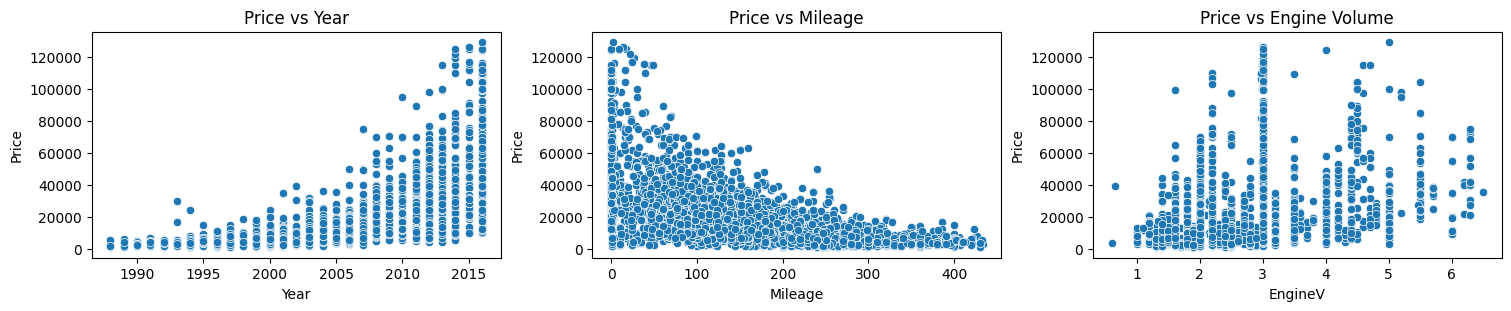

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,3), layout="constrained")
sns.scatterplot(x=data['Year'], y=data['Price'], ax=axs[0])
sns.scatterplot(x=data['Mileage'], y=data['Price'], ax=axs[1])
sns.scatterplot(x=data['EngineV'], y=data['Price'], ax=axs[2])

axs[0].set_title("Price vs Year")
axs[1].set_title("Price vs Mileage")
axs[2].set_title("Price vs Engine Volume")

From these graphs it is clear that price increases exponentially year by year due to which there is a non-colinear relation of Price with other variables. Therefore in order to make these relations colinear, we can take log of the variable price.

Text(0.5, 1.0, 'Price vs Engine Volume')

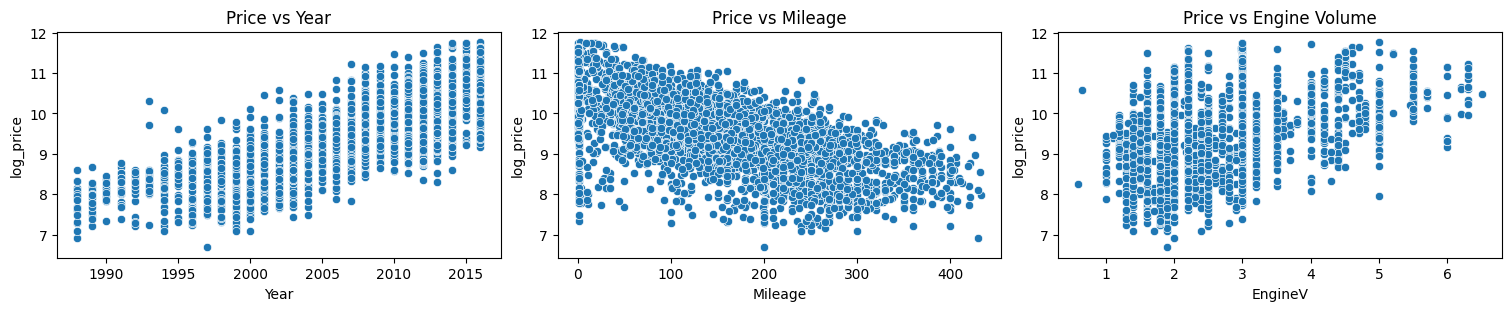

In [14]:
log_price = np.log(data['Price'])

#  Adding this log price as a column in dataframe:
data['log_price'] = log_price

# Plotting the above graphs again with log_price:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,3), layout="constrained")
sns.scatterplot(x=data['Year'], y=data['log_price'], ax=axs[0])
sns.scatterplot(x=data['Mileage'], y=data['log_price'], ax=axs[1])
sns.scatterplot(x=data['EngineV'], y=data['log_price'], ax=axs[2])

axs[0].set_title("Price vs Year")
axs[1].set_title("Price vs Mileage")
axs[2].set_title("Price vs Engine Volume")

Although scattered, we can still observe a linear relation in the above graphs.

#### Other Assumptions:
<li> No Endogeneity: According to this assumption, the error term should not be co-related with any of the predictor variables
<li> Normalization: Since our dataset is big enough, we can assume that the error terms are normally distributed.
<li> Homoscedasticity: From the above graphs it is clearly visible that all the data points lie in a particular band and varience among data points is constant. Therefore our dataset is not homoscedastistic.
<li>No Auto-corelation: Our data does not come from a time series or a panel data. All the observations are not inter-corelated in any way. Therefore, no auto-corelation is present.

In [15]:
# Dropping the Price column:
data.drop(columns="Price", inplace=True)

### Multicolinearity
<p> Multi-colinearity assumption states that no predictor variable should have a colinear relation with other predictor, but as we know that there is going to be a corelation between Year and mileage. Therefore we should definately check for multicolinearity.</p>
<p>Unfortunately sklearn does not have a direct method to check for multicolinearity. So, we will use statsmodels VIF method to check.

##### VIF:
The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.


In [16]:
data.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Model', 'log_price'],
      dtype='object')

In [17]:
variables = data[['Mileage', "EngineV", 'Year']]
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
VIF['features'] = variables.columns
VIF

,VIF,features
0,3.795037,Mileage
1,7.636536,EngineV
2,10.338236,Year


### Dummy variables

In order to deal with categorial data we need to create dummy variables for each categorial feature.
<p> It should be noted that we need to create N-1 dummies for each feature if there are N possible values.
<p>Reason: If we create N dummies, then each dummy column will be perfectly multicolinear with other dummies.

In [18]:
data_dummies = pd.get_dummies(data=data, drop_first=True, dtype=int)

In [19]:
# Check if VIF is greater than 10 for any feature:
variables = data_dummies
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
VIF['features'] = variables.columns
VIF[VIF['VIF'] >= 10]

d:\Python_works\ML\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,features
2,1.056883e+01,Year
3,1.733330e+01,log_price
4,1.757395e+05,Brand_BMW
5,2.129525e+05,Brand_Mercedes-Benz
6,inf,Brand_Mitsubishi
...,...,...
300,1.232675e+01,Model_X1
301,1.241137e+01,Model_X3
302,1.129665e+02,Model_X5
304,3.942877e+01,Model_X6


It seems like most of the model feature dummy has  a value greater than 10, as it is always the case if a category feature hase large number of possible values. 
<p> Lets try again after removing the model feature.

In [20]:
data_2 = data.drop(columns='Model')
data_2.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [21]:
data_2 = data_2[['log_price', 'Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year']]
data_2.columns

Index(['log_price', 'Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'],
      dtype='object')

In [22]:
# Creating Dummies:
data_dummies_2 = pd.get_dummies(data=data_2, drop_first=True, dtype=int)

# Checking VIFs
variables = data_dummies_2
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(data_dummies_2.shape[1])]
VIF['features'] = variables.columns
VIF

,VIF,features
0,497.235749,log_price
1,8.927508,Mileage
2,13.907594,EngineV
3,525.583831,Year
4,2.619123,Brand_BMW
5,3.098296,Brand_Mercedes-Benz
6,2.065365,Brand_Mitsubishi
7,2.662944,Brand_Renault
8,2.500186,Brand_Toyota
9,3.526726,Brand_Volkswagen


<li> On observing this table we can see that the year log_price is highly multicolinear with other features as it should be.
<li> Registration feature is also highly colinear as most of the vehicles in our dataset are already registered.
<li> feature Year is showing even more multicolinearity than the log price 
<p> So we should remove these features as they can cause errors in selecting coefficients.

In [23]:
data_3 = data_2.drop(columns=['Registration', "Year"])
data_dummies_3 = pd.get_dummies(data_3, drop_first=True, dtype=int)
variables = data_dummies_3.drop(columns='log_price')
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
VIF['features'] = variables.columns
VIF

,VIF,features
0,4.422562,Mileage
1,6.208526,EngineV
2,2.172097,Brand_BMW
3,2.674677,Brand_Mercedes-Benz
4,1.466103,Brand_Mitsubishi
5,1.795711,Brand_Renault
6,1.942185,Brand_Toyota
7,2.427157,Brand_Volkswagen
8,1.434772,Body_hatch
9,1.495338,Body_other


This seems to be a much better option as all the VIFs are under 5.00. So lets perform perform the regression on this dataset.

### Linear Regression

#### Declaring Inputs and Targets

In [24]:
# Splitting data into train and test 
targets = data_dummies_3['log_price']
inputs = data_dummies_3.drop(columns='log_price')

#### Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
# Creating Scaler object
scaler = StandardScaler()
#  Calculating mean and st.dev feature-wise
scaler.fit(inputs)

StandardScaler()

In [26]:
inputs_scaled = scaler.transform(inputs)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

#### Create Regression

In [28]:
reg = LinearRegression()
reg.fit(inputs_scaled, targets)

LinearRegression()

In [29]:
y_hat = reg.predict(X_train)

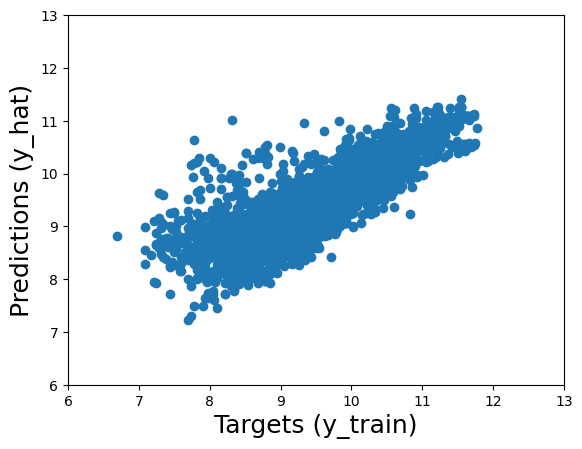

In [30]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(Y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residuals pdf')

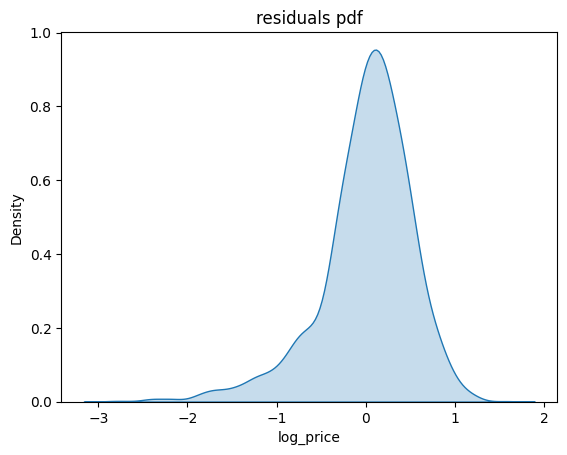

In [31]:
sns.kdeplot(Y_train-y_hat, fill=True)
plt.title("residuals pdf")

above two graphs shows the relation between predicted and observer values.
<li> It can be noted that according to first graph, our predictions are highly colinear with the actual values.
<li> residuals pdf shows that the mean error is Normalized around 0.

In [32]:
# R-Squared:
reg.score(X_train, Y_train)

0.6389079745090811

Our model only explains around 64 percent of data values that means there is a huge chance of improvement.
<p> Now with that in mind, I want to add Year feature again in our model as it is possible that there are still some vehicles in our database that ight be vintage. So Year may play a big role in improving our model.

#### Remodelling with Registration and Year variables

In [33]:
data_dummies_2.columns

Index(['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

##### Targets and Inputs

In [34]:
targets_2 = data_dummies_2['log_price']
inputs = data_dummies_2.drop(columns='log_price')


##### Standardizing Inputs

In [35]:
scaler2 = StandardScaler()
scaler2.fit(inputs)
inputs_scaled_2 = scaler2.transform(inputs)

##### Data Split

In [36]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(inputs_scaled_2, targets_2, test_size=0.2, random_state=42)

##### Model Training

In [37]:
reg2 = LinearRegression()
reg2.fit(x_train2, y_train2)

LinearRegression()

##### R-squared

In [38]:
reg2.score(x_train2, y_train2)

0.8857973735195581

By including the Year feature our model is now capable of explaining 89 percent of pries.

In [39]:
y_hat2 = reg2.predict(x_train2)

Text(0, 0.5, 'Training Predictions')

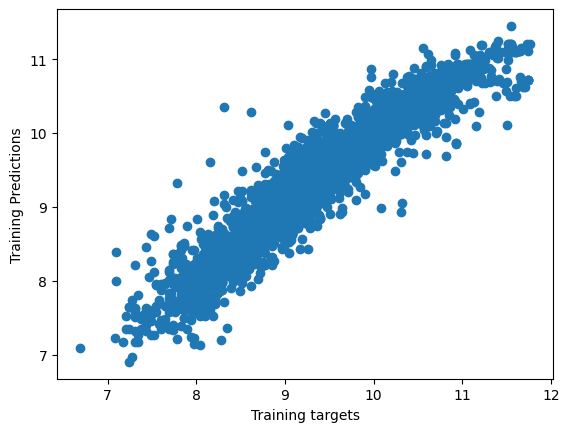

In [40]:
plt.scatter(y_train2, y_hat2)
plt.xlabel("Training targets")
plt.ylabel('Training Predictions')

Text(0.5, 1.0, 'Residuals PDF')

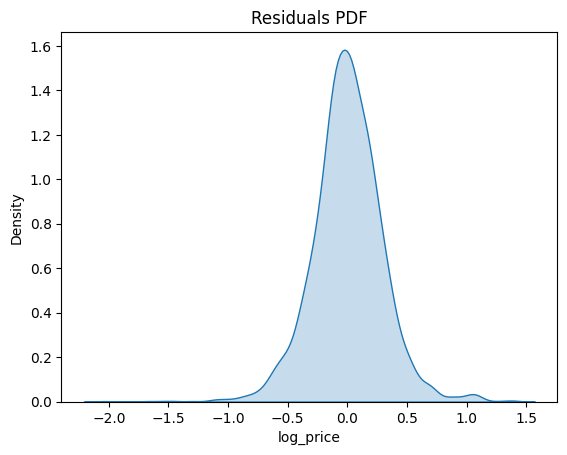

In [41]:
sns.kdeplot(y_train2-y_hat2, fill=True)
plt.title("Residuals PDF")

If we compare this PDF for residuals with the pdf generated by the previous model, we will notice that our mean is still centered around 0 while the width of graph reduced showing higher accuracy.

#### Testing

In [42]:
y_hat_test = reg.predict(X_test)
y_hat_test2 = reg2.predict(x_test2)

Text(0, 0.5, 'Test Predictions')

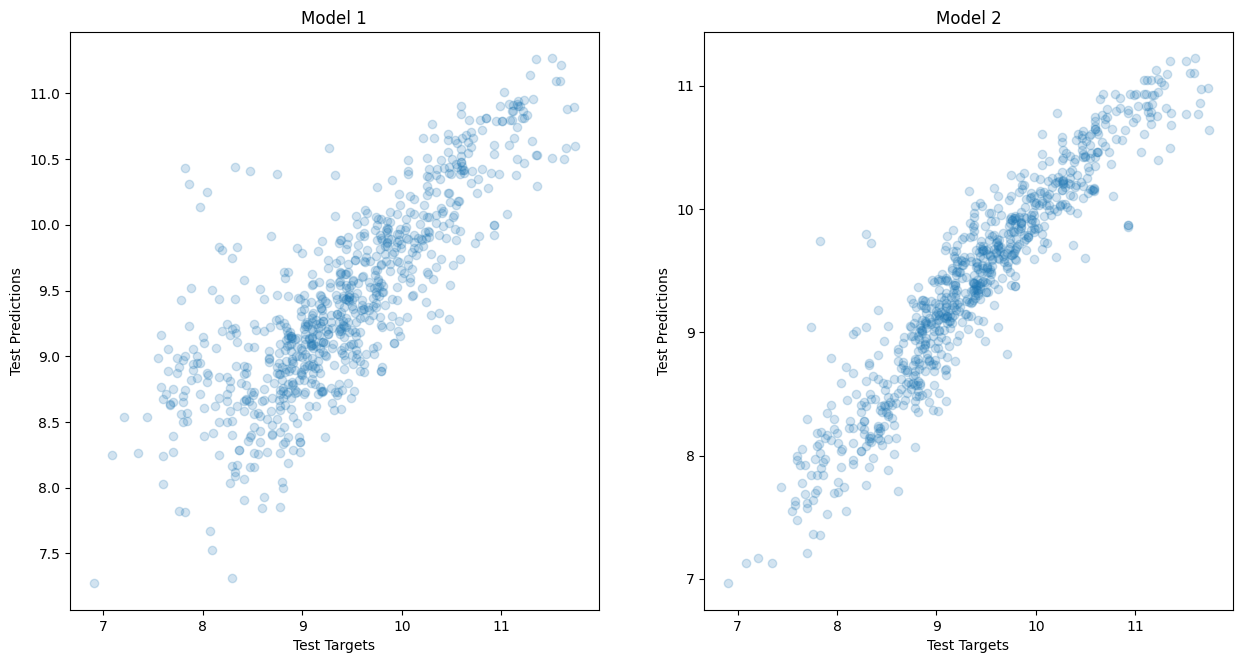

In [43]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,7.5))

axs[0].scatter(Y_test, y_hat_test, alpha=0.2)
axs[1].scatter(y_test2, y_hat_test2, alpha=0.2)

axs[0].set_title("Model 1")
axs[0].set_xlabel("Test Targets")
axs[0].set_ylabel("Test Predictions")

axs[1].set_title("Model 2")
axs[1].set_xlabel("Test Targets")
axs[1].set_ylabel("Test Predictions")


In [44]:
reg.score(X_test, y_hat_test)

1.0

In [45]:
reg2.score(x_test2, y_hat_test2)

1.0

On observing the above two scatterplots between actual price and predicted price, we can definately say that the Second model's predictions are far more accurate. 

#### Manual check of predictions

In [46]:
# To get actual prices we can take exponent of log_prices
df_pf = pd.DataFrame(np.exp(y_hat_test2), columns=['Predictions'])

In [47]:
y_test2 = y_test2.reset_index(drop=True)
df_pf['Targets'] = np.exp(y_test2)
df_pf['Residuals'] = np.absolute(df_pf['Predictions'] - df_pf['Targets'])
df_pf['Difference %age'] = df_pf['Residuals']/df_pf['Targets']*100
df_pf.head()

,Predictions,Targets,Residuals,Difference %age
0,22797.550033,24996.0,2198.449967,8.795207
1,5714.751669,8900.0,3185.248331,35.789307
2,17846.224080,19500.0,1653.775920,8.480902
3,11795.102746,12000.0,204.897254,1.707477
4,3436.596770,5400.0,1963.403230,36.359319


In [48]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference %age
count,774.000000,774.000000,774.000000,774.000000
mean,16937.176085,18316.015685,4214.802065,23.717631
std,14076.976062,19413.011760,8018.568326,33.519573
min,1055.977077,999.000000,0.899317,0.023666
25%,6807.197880,6800.000000,721.936354,7.551629
50%,12566.068489,11788.500000,1846.470816,16.567031
75%,22010.808353,21500.000000,4136.488387,31.465261
max,74721.705439,125000.000000,83054.105491,581.031099


This descriptive stats table shows that Our model's prediction for 75% of houses was deviated by 31% or less. 

<hr>

<hr>

<hr>

<hr>

What if we were to create our model without filtering any variables and including the **Models feature** as well?
Let's perform a quick regression with the **data_dummies** dataset and try to find out.

In [49]:
inputs = data_dummies.drop(columns='log_price')
targets_3 = data_dummies['log_price']

In [50]:
scaler3 = StandardScaler()
scaler3.fit(inputs)
inputs_scaled_3 = scaler3.transform(inputs)

In [51]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(inputs_scaled_3, targets_3, test_size=0.2, random_state=42)

In [52]:
reg3 = LinearRegression()
reg3.fit(x_train3, y_train3)


LinearRegression()

In [53]:
reg3.score(x_train3, y_train3)

0.9435122589467111

The **R-Squared** comes out to be around 94% that means this model has even better accuracy than the previous one.

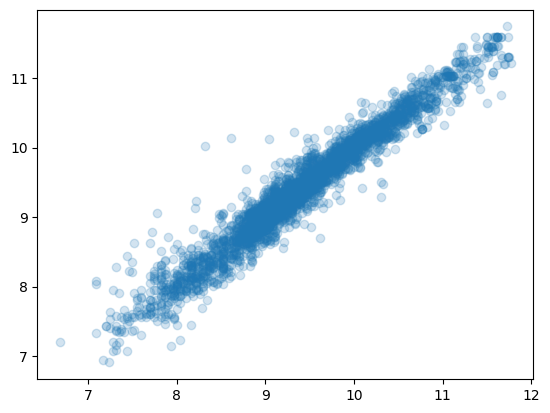

In [54]:
y_hat3 = reg3.predict(x_train3)
plt.scatter(y_train3, y_hat3, alpha=0.2)

The corelation seems to be preety good as well for the training set. Now let's run our model on Test set and see if it can predict the price with same accuracy.

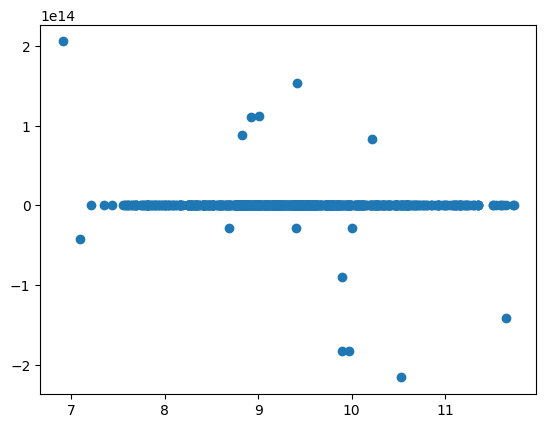

In [55]:
y_hat_test3 = reg3.predict(x_test3)
plt.scatter(y_test3, y_hat_test3)

This graph shows that the model is not able to predict the prices correctly for testing set even though it was able to predict output in training set.<br> Hence we can say that this model fails miserably.

In [56]:
df_pf2 = pd.DataFrame(np.exp(y_hat_test3), columns=["Prediction"])
df_pf2.head()

C:\Users\shrit\AppData\Local\Temp\ipykernel_21292\3690317494.py:1: RuntimeWarning: overflow encountered in exp
  df_pf2 = pd.DataFrame(np.exp(y_hat_test3), columns=["Prediction"])


,Prediction
0,22759.148448
1,6859.443897
2,31028.424930
3,11193.938961
4,4230.884369


In [57]:
y_test3 = y_test3.reset_index(drop=True)
df_pf2['Target'] = np.exp(y_test3)
df_pf2['Residual'] = df_pf2['Target'] - df_pf2['Prediction']
df_pf2['Diff_percent'] = np.absolute(df_pf2['Residual']/df_pf2['Target']*100)

In [58]:
df_pf2.describe()

d:\Python_works\ML\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Python_works\ML\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
d:\Python_works\ML\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Prediction,Target,Residual,Diff_percent
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,18316.015685,-inf,inf
std,NaN,19413.011760,NaN,NaN
min,0.000000e+00,999.000000,-inf,0.001938
25%,6.757036e+03,6800.000000,-1.440078e+03,5.634486
50%,1.178569e+04,11788.500000,-7.904332e+01,12.695235
75%,2.335404e+04,21500.000000,1.200236e+03,23.483207
max,inf,125000.000000,1.155550e+05,inf


As we can notice from this descriptive statistic table, that 3rd model was so off that we get the residual as inf.